# Clustering Crypto

In [28]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [29]:
# Load the crypto_data.csv dataset.
file_path = ("crypto_data.csv")
df = pd.read_csv(file_path, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [30]:
# Keep all the cryptocurrencies that are being trade
crypto_df = df.loc[df['IsTrading']==True]
crypto_df .head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [31]:
# Remove the "IsTrading" column. 
Newcrypto_df = crypto_df.drop(columns='IsTrading', axis=1)
Newcrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [32]:
# Remove rows that have at least 1 null value.
NoNewcrypto_df = Newcrypto_df.dropna()
NoNewcrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [33]:
NoNewcrypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [34]:
# Keep the rows where coins are mined.
coinsmined_df = NoNewcrypto_df.loc[NoNewcrypto_df['TotalCoinsMined']>0]
coinsmined_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [35]:
# Create a new DataFrame that holds only the cryptocurrencies names.
cryptoname_df = coinsmined_df[['CoinName']]
cryptoname_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [36]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
cluster_df = coinsmined_df.drop(columns='CoinName', axis=1)
cluster_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [37]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(cluster_df, columns=['Algorithm','ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Standardize the data with StandardScaler().
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [39]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
X_scaled_pca = pca.fit_transform(X_scaled)
X_scaled_pca

array([[-0.33350501,  1.04282824, -0.32108009],
       [-0.31677343,  1.04321919, -0.3213415 ],
       [ 2.32049641,  1.76075533, -0.39409765],
       ...,
       [ 0.32663597, -2.31325227,  0.20650304],
       [-0.1421955 , -2.0053283 ,  0.18950532],
       [-0.27745003,  0.87717059, -0.1242342 ]])

In [40]:
index_col = (X.index.tolist())
print(index_col[0:5])

['42', '404', '1337', 'BTC', 'ETH']


In [41]:
# Create a DataFrame with the three principal components.
X_scaled_pca_df = pd.DataFrame(
    data=X_scaled_pca, columns=['pc 1', 'pc 2', 'pc 3'], index=index_col
    )
X_scaled_pca_df.head()



,pc 1,pc 2,pc 3
42,-0.333505,1.042828,-0.321080
404,-0.316773,1.043219,-0.321342
1337,2.320496,1.760755,-0.394098
BTC,-0.143681,-1.336913,0.123582
ETH,-0.147927,-2.093369,0.232424


In [42]:
pca.explained_variance_ratio_

array([0.02792951, 0.02139488, 0.02045904])

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\jrobi\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



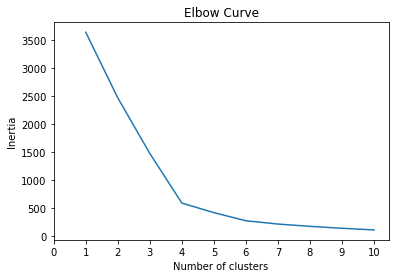

In [43]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled_pca_df)
    inertia.append(km.inertia_)

elbow_data = {'k':k, 'inertia': inertia}
df_elbowdata = pd.DataFrame(elbow_data)

import matplotlib.pyplot as plt

plt.plot(df_elbowdata['k'], df_elbowdata['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [44]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(X_scaled_pca_df)

# Predict clusters
predictions = model.predict(X_scaled_pca_df)

predictions



array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [45]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = cluster_df.join(X_scaled_pca_df, how='inner')
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,pc 1,pc 2,pc 3
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.333505,1.042828,-0.321080
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.316773,1.043219,-0.321342
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.320496,1.760755,-0.394098
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.143681,-1.336913,0.123582
ETH,Ethash,PoW,1.076842e+08,0,-0.147927,-2.093369,0.232424
...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.421222,0.629604,-0.486160
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.331541,1.042745,-0.321081
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.326636,-2.313252,0.206503
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.142196,-2.005328,0.189505


In [46]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df = clustered_df.join(cryptoname_df, how='inner')
clustered_df['class'] = model.labels_
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,pc 1,pc 2,pc 3,CoinName,class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.333505,1.042828,-0.321080,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.316773,1.043219,-0.321342,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.320496,1.760755,-0.394098,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.143681,-1.336913,0.123582,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.147927,-2.093369,0.232424,Ethereum,0
...,...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.421222,0.629604,-0.486160,ZEPHYR,1
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.331541,1.042745,-0.321081,Gapcoin,1
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.326636,-2.313252,0.206503,Beldex,0
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.142196,-2.005328,0.189505,Horizen,0


In [47]:
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,pc 1,pc 2,pc 3,CoinName,class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.333505,1.042828,-0.321080,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.316773,1.043219,-0.321342,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.320496,1.760755,-0.394098,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.143681,-1.336913,0.123582,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.147927,-2.093369,0.232424,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.163900,-1.136785,0.016854,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.407273,1.247760,-0.368449,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.153993,-2.255427,0.250581,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.146362,-2.093442,0.232425,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.142194,-2.005328,0.189505,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [48]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px
fig = px.scatter_3d(
clustered_df,
x="pc 3",
y="pc 2",
z="pc 1",
color="class",
symbol="class",
width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [49]:
# Create a table with tradable cryptocurrencies.
tradablecrypto_table = clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinsMined','TotalCoinSupply'])
hvplot.show(tradablecrypto_table)

Launching server at http://localhost:57533


In [50]:
# Print the total number of tradable cryptocurrencies.
clustered_df['CoinName'].count()

532

In [51]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scale_df = clustered_df[['TotalCoinsMined','TotalCoinSupply']]
scaled_df = MinMaxScaler().fit_transform(scale_df)
scaled_df

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       ...,
       [9.90135079e-04, 1.40022261e-03],
       [7.37028150e-06, 2.10000000e-05],
       [1.29582282e-07, 1.00000000e-06]])

In [54]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = clustered_df[['TotalCoinsMined','TotalCoinSupply','CoinName']]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
cl_df = clustered_df['class']
plot_df = plot_df.join(cl_df, how='inner')
plot_df.head(10)

,TotalCoinsMined,TotalCoinSupply,CoinName,class
42,4.199995e+01,42,42 Coin,1
404,1.055185e+09,532000000,404Coin,1
1337,2.927942e+10,314159265359,EliteCoin,1
BTC,1.792718e+07,21000000,Bitcoin,0
ETH,1.076842e+08,0,Ethereum,0
LTC,6.303924e+07,84000000,Litecoin,0
DASH,9.031294e+06,22000000,Dash,1
XMR,1.720114e+07,0,Monero,0
ETC,1.133597e+08,210000000,Ethereum Classic,0
ZEC,7.383056e+06,21000000,ZCash,0


In [57]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
 x="TotalCoinsMined",
 y="TotalCoinSupply",
 by='Class',
 hover_cols=['CoinName']
)



:Scatter   [TotalCoinsMined]   (TotalCoinSupply)